# Capstone Project - The Battle of Neighborhoods
<br>
Stefanos Bontas, May 2020
<br>
<hr>

### The concept:
Athens metropolitan area is famous for the variety of food and it is an expandable industry.

### The objective: 
In this project, our objective is to find the most suitable locations for investing in order to establish a new burger restaurant.

### The selecting criteria:
We have to define the specifications for a location to be suitable:

•	Be close to a metro railway station, in order to be easily accessible by the mass, as Athens has a huge problem concerning the car parking

•	Total number of similar restaurants with a radius of 1,000 meters around each metro station

•	The nearest burger restaurant to the metro line station should also have some impact on the results

First, we'll install the needed libraries (geopy and folium):

In [1]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [2]:
!conda install -c conda-forge folium --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.11.0              |             py_0          61 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          87 KB

The following NEW packages will be INSTALLED:

    branca: 0.4.1-py_0  conda-forge
    folium: 0.11.0-py_0 conda-forge


folium-0.11.0        | 61 KB     | ##################################### | 100% 
branca-0.4.1         | 26 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


Then we'll import the rest of the needed libraries: <br>

o	Pandas, for dataset modification<br>
o	Numpy for handling numerical operations<br>
o	Matplotlib, for generating meaningful charts<br>
o	Folium, for map visualizations

In [3]:
from geopy.geocoders import Nominatim
import pandas as pd
from pandas.io.json import json_normalize
import folium
import requests
import numpy as np

# import the needed unsupervised machine learning algorithm
from sklearn.cluster import KMeans

from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.pyplot import subplots

from sklearn import preprocessing

print('Done!')

Done!


### Data gathering

First, we'll import the point zero, which should be used as the radius center for calculating distances around Athens metropolitan area. This is Syntagma square.

In [4]:
address = 'Syntagma Square, Greece'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Syntagma square (point zero) coordinates are {}, {}.'.format(latitude, longitude))

Syntagma square (point zero) coordinates are 37.9755029, 23.7357427.


Before moving on, let's visualise the map with Syntagma square:

In [5]:
syntagma_map = folium.Map(location=[latitude, longitude], zoom_start=19)
folium.Marker([latitude, longitude], popup='Syntagma Square').add_to(syntagma_map)
syntagma_map

Then, we'll configure the foursquare API keys for downloading Athens metro stations:

In [6]:
CLIENT_ID = 'UV2HOC2Y0OGKV1UJYJHHBIV2C4DLKCZO3FNKINOKXK0Y2HB5' # your Foursquare ID
CLIENT_SECRET = '02AHLD4ZEQWHKWUFNVTY1PHXSNZXPAP5OVOKDPHIUM4NCKXY' # your Foursquare Secret
VERSION = '20180604'

foursquare verue category for metro stations --> 4bf58dd8d48988d1fd931735

In [7]:
radius = 20000 # 20,000 meters radius from Athens city center (Syntagma square)
LIMIT = 200
category_id = '4bf58dd8d48988d1fd931735' # This is the foursquare verue category for metro stations

In [8]:
url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    category_id,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude,
    longitude, 
    radius,
    LIMIT
)

In [14]:
stations_list = requests.get(url).json()['response']['groups'][0]['items']
stations_init_df = json_normalize(stations_list)

stations_init_df.head() # showing the first 5 results of the downloaded dataset

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b963ad8f964a5208cc134e3-0,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",4b963ad8f964a5208cc134e3,Πλατεία Συντάγματος,GR,Αθήνα,Ελλάδα,NaN,...,"[Πλατεία Συντάγματος, 105 63 Αθήνα, Αττική, Ελ...","[{'label': 'display', 'lat': 37.97523509105853...",37.975235,23.735298,NaN,105 63,Αττική,Syntagma Metro Station (Σταθμός Μετρό Σύνταγμα),0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c8cd57655fba093d8c162ab-1,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",4c8cd57655fba093d8c162ab,Στρατηγού Μακρυγιάννη,GR,Αθήνα,Ελλάδα,Αθανάσιου Διάκου,...,"[Στρατηγού Μακρυγιάννη (Αθανάσιου Διάκου), 117...","[{'label': 'display', 'lat': 37.96851572816467...",37.968516,23.730195,NaN,117 42,Αττική,Akropoli Metro Station (Σταθμός Μετρό Ακρόπολη),0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b9a2260f964a5208ba035e3-2,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",4b9a2260f964a5208ba035e3,Ευαγγελισμός,GR,Αθήνα,Ελλάδα,NaN,...,"[Ευαγγελισμός, 106 76 Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.97617261888282...",37.976173,23.747163,NaN,106 76,Αττική,Evangelismos Metro Station (Σταθμός Μετρό Ευαγ...,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bc9f225937ca593d6aca692-3,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",4bc9f225937ca593d6aca692,Πλατεία Μοναστηρακίου,GR,Αθήνα,Ελλάδα,NaN,...,"[Πλατεία Μοναστηρακίου, 105 54 Αθήνα, Αττική, ...","[{'label': 'display', 'lat': 37.97606657119692...",37.976067,23.725752,NaN,105 54,Αττική,Monastiraki Metro Station (Σταθμός Μετρό Μονασ...,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bfbaa6ef214a593ca6baf0e-4,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",4bfbaa6ef214a593ca6baf0e,Πανόρμου 76,GR,Αθήνα,Ελλάδα,NaN,...,"[Πανόρμου 76, 115 23 Αθήνα, Αττική, Ελλάδα]","[{'label': 'display', 'lat': 37.99329791120338...",37.993298,23.764135,Ερυθρός Σταυρός,115 23,Αττική,Panormou Metro Station (Σταθμός Μετρό Πανόρμου),0,[]


Then we'll clean the columns so as to be meaningful:

In [15]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance', 'venue.location.postalCode']
stations_filtered_df = stations_init_df.loc[:, filtered_columns]

# filter the category for each row
stations_filtered_df['venue_type'] = stations_init_df['venue.categories'].apply(lambda x: dict(x[0])['name'])

# clean columns
stations_filtered_df.columns = [col.split('.')[-1] for col in stations_filtered_df.columns]

stations_df = stations_filtered_df[stations_filtered_df['venue_type'] == 'Metro Station']
stations_df = stations_df.drop('categories', axis=1)
stations_df.head()

,name,lat,lng,distance,postalCode,venue_type
0,Syntagma Metro Station (Σταθμός Μετρό Σύνταγμα),37.975235,23.735298,49,105 63,Metro Station
1,Akropoli Metro Station (Σταθμός Μετρό Ακρόπολη),37.968516,23.730195,917,117 42,Metro Station
2,Evangelismos Metro Station (Σταθμός Μετρό Ευαγ...,37.976173,23.747163,1004,106 76,Metro Station
3,Monastiraki Metro Station (Σταθμός Μετρό Μονασ...,37.976067,23.725752,878,105 54,Metro Station
4,Panormou Metro Station (Σταθμός Μετρό Πανόρμου),37.993298,23.764135,3182,115 23,Metro Station


In [16]:
stations_df.shape

(67, 6)

Now that we have filtered the columns, we'll proceed with rows filtering. To be more specific, we should find all of the names where the Station is not being included in the name string:

In [17]:
stations_df[stations_df['name'].str.find('Station') == -1]

,name,lat,lng,distance,postalCode,venue_type
13,Θησείο,37.977394,23.720287,1372,NaN,Metro Station
46,Αμαξοστάσιο Μετρό Ελαιώνα,37.986554,23.686795,4467,NaN,Metro Station
63,Αμαξοστάσιο Μετρό Δουκίσης Πλακεντίας,38.022099,23.835587,10179,NaN,Metro Station


The rows 13, 46 & 63 represent a metro trains parking facility and they should be discarded from the dataframe since they are not actual metro line stations:

In [18]:
stations_df = stations_df[stations_df['name'].str.contains('Station')]
stations_df.head()

,name,lat,lng,distance,postalCode,venue_type
0,Syntagma Metro Station (Σταθμός Μετρό Σύνταγμα),37.975235,23.735298,49,105 63,Metro Station
1,Akropoli Metro Station (Σταθμός Μετρό Ακρόπολη),37.968516,23.730195,917,117 42,Metro Station
2,Evangelismos Metro Station (Σταθμός Μετρό Ευαγ...,37.976173,23.747163,1004,106 76,Metro Station
3,Monastiraki Metro Station (Σταθμός Μετρό Μονασ...,37.976067,23.725752,878,105 54,Metro Station
4,Panormou Metro Station (Σταθμός Μετρό Πανόρμου),37.993298,23.764135,3182,115 23,Metro Station


In [19]:
stations_df.shape

(64, 6)

In [ ]:
stations_df['name GR'] = stations_df['name'].apply(lambda x: x.split('(')[1].replace(')', '').strip())
stations_df['name'] = stations_df['name'].apply(lambda x: x.split('(')[0]).str.strip()

fixed_columns = [stations_df.columns[0]] + [stations_df.columns[-1]] + list(stations_df.columns[1:-1])
stations_df = stations_df[fixed_columns]

In [29]:
stations_df.head()

,name,name GR,lat,lng,distance,postalCode,venue_type
0,Syntagma Metro Station,Σταθμός Μετρό Σύνταγμα,37.975235,23.735298,49,105 63,Metro Station
1,Akropoli Metro Station,Σταθμός Μετρό Ακρόπολη,37.968516,23.730195,917,117 42,Metro Station
2,Evangelismos Metro Station,Σταθμός Μετρό Ευαγγελισμός,37.976173,23.747163,1004,106 76,Metro Station
3,Monastiraki Metro Station,Σταθμός Μετρό Μοναστηράκι,37.976067,23.725752,878,105 54,Metro Station
4,Panormou Metro Station,Σταθμός Μετρό Πανόρμου,37.993298,23.764135,3182,115 23,Metro Station


Now the dataframe stations_df is ready for use.

Next we'll rename the indexes of dataframe stations_df and we'll remove the greek names as thy are no longer needed for consistency purposes.

In [30]:
stations_df.rename(columns={'name': 'station',
                            'name GR': 'station GR',
                            'distance': 'Distance from Center',
                            'postalCode': 'Postal Code',
                            'venue_type': 'Venue Type'},
                   inplace=True)

stations_df.reset_index(drop=True, inplace=True)

stations_df.drop(['station GR'], axis = 1) 

stations_df.head()

,station,station GR,lat,lng,Distance from Center,Postal Code,Venue Type
0,Syntagma Metro Station,Σταθμός Μετρό Σύνταγμα,37.975235,23.735298,49,105 63,Metro Station
1,Akropoli Metro Station,Σταθμός Μετρό Ακρόπολη,37.968516,23.730195,917,117 42,Metro Station
2,Evangelismos Metro Station,Σταθμός Μετρό Ευαγγελισμός,37.976173,23.747163,1004,106 76,Metro Station
3,Monastiraki Metro Station,Σταθμός Μετρό Μοναστηράκι,37.976067,23.725752,878,105 54,Metro Station
4,Panormou Metro Station,Σταθμός Μετρό Πανόρμου,37.993298,23.764135,3182,115 23,Metro Station


Next we'll visualize the Athens metro stations based on downloaded latitude and longitude values from dataframe

In [31]:
athens_map = folium.Map(location=[latitude, longitude], zoom_start=11)

Last, we'll add some markers to the map:

In [32]:
for lat, lng, station in zip(stations_df['lat'],
                          stations_df['lng'],
                          stations_df['station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#ffffff',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(athens_map)
    
athens_map

Then we'll download the fast food restaurants 1,000 meters radius to the Athens metro stations. <br> In
foursquare verue category for metro stations --> 4bf58dd8d48988d16e941735

In [37]:
def getNearbyRestaurants(categoryId, stations, latitudes, longitudes, radius=1000):
    
    print('Findind restaurants near Athens metro stations, please wait...\n')
    
    restaurants_list=[]
    for station, lat, lng in zip(stations, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            categoryId,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby gym
        restaurants_list.append([(
            station,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name']
        ) for v in results])

    nearby_restaurants_df = pd.DataFrame([item for venue_list in restaurants_list for item in venue_list])
    nearby_restaurants_df.columns = [
                  'station',
                  'lat',
                  'lng',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Distance from Station',
                  'Venue Category']
    print('Done')
    return(nearby_restaurants_df)

In [44]:
categoryId = '4bf58dd8d48988d16e941735'
restaurant_venues_df = getNearbyRestaurants(categoryId, stations=stations_df['station'], latitudes=stations_df['lat'], longitudes=stations_df['lng'])

Findind restaurants near Athens metro stations, please wait...

Done


In [45]:
restaurant_venues_df.head()

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station,Venue Category
0,Syntagma Metro Station,37.975235,23.735298,Smak,37.977420,23.730072,519,Fast Food Restaurant
1,Syntagma Metro Station,37.975235,23.735298,Hot Hot Burger Bar,37.977614,23.731081,454,Burger Joint
2,Syntagma Metro Station,37.975235,23.735298,Καυτή Πατάτα,37.977655,23.730336,512,Fast Food Restaurant
3,Syntagma Metro Station,37.975235,23.735298,Da Panda 大牌档,37.975938,23.733411,183,Fast Food Restaurant
4,Syntagma Metro Station,37.975235,23.735298,Food Str,37.977294,23.729047,594,Burger Joint


Now we'll group the dataframe by Venue Category:

In [46]:
restaurant_venues_df.groupby(['Venue Category']).count()

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station
Venue Category,,,,,,,
American Restaurant,5,5,5,5,5,5,5
Bakery,8,8,8,8,8,8,8
Burger Joint,22,22,22,22,22,22,22
Café,14,14,14,14,14,14,14
Chinese Restaurant,4,4,4,4,4,4,4
Cocktail Bar,7,7,7,7,7,7,7
Comfort Food Restaurant,8,8,8,8,8,8,8
Creperie,3,3,3,3,3,3,3
Fast Food Restaurant,286,286,286,286,286,286,286


In [47]:
restaurant_venues_df.shape

(417, 8)

We'll keep only the categories American Restaurant, Burger Joint and Fast Food Restaurant

In [48]:
restaurant_venues_df = restaurant_venues_df[restaurant_venues_df['Venue Category'].isin(['American Restaurant', 'Burger Joint', 'Fast Food Restaurant'])]
restaurant_venues_df.head()

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station,Venue Category
0,Syntagma Metro Station,37.975235,23.735298,Smak,37.977420,23.730072,519,Fast Food Restaurant
1,Syntagma Metro Station,37.975235,23.735298,Hot Hot Burger Bar,37.977614,23.731081,454,Burger Joint
2,Syntagma Metro Station,37.975235,23.735298,Καυτή Πατάτα,37.977655,23.730336,512,Fast Food Restaurant
3,Syntagma Metro Station,37.975235,23.735298,Da Panda 大牌档,37.975938,23.733411,183,Fast Food Restaurant
4,Syntagma Metro Station,37.975235,23.735298,Food Str,37.977294,23.729047,594,Burger Joint


In [49]:
restaurant_venues_df.shape

(313, 8)

In [50]:
restaurant_venues_df.groupby(['Venue Category']).count().head(20)

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station
Venue Category,,,,,,,
American Restaurant,5,5,5,5,5,5,5
Burger Joint,22,22,22,22,22,22,22
Fast Food Restaurant,286,286,286,286,286,286,286


Now we'll add the distance from each metro station to the nearest restaurant and number of existing restaurants in its neighborhood

In [51]:
restaurant_venues_min_df = pd.merge(restaurant_venues_df,
                              pd.DataFrame(restaurant_venues_df.groupby('station')['Distance from Station'].min()),
                              on='station', how='inner')

In [52]:

restaurant_venues_min_df.head()

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station_x,Venue Category,Distance from Station_y
0,Syntagma Metro Station,37.975235,23.735298,Smak,37.977420,23.730072,519,Fast Food Restaurant,133
1,Syntagma Metro Station,37.975235,23.735298,Hot Hot Burger Bar,37.977614,23.731081,454,Burger Joint,133
2,Syntagma Metro Station,37.975235,23.735298,Καυτή Πατάτα,37.977655,23.730336,512,Fast Food Restaurant,133
3,Syntagma Metro Station,37.975235,23.735298,Da Panda 大牌档,37.975938,23.733411,183,Fast Food Restaurant,133
4,Syntagma Metro Station,37.975235,23.735298,Food Str,37.977294,23.729047,594,Burger Joint,133


In [53]:
restaurant_venues_min_df = pd.merge(restaurant_venues_min_df,
                           pd.DataFrame(restaurant_venues_min_df.groupby(['station']).count())['lat'],
                           on='station', how='inner')

In [54]:
restaurant_venues_min_df.head()

,station,lat_x,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station_x,Venue Category,Distance from Station_y,lat_y
0,Syntagma Metro Station,37.975235,23.735298,Smak,37.977420,23.730072,519,Fast Food Restaurant,133,12
1,Syntagma Metro Station,37.975235,23.735298,Hot Hot Burger Bar,37.977614,23.731081,454,Burger Joint,133,12
2,Syntagma Metro Station,37.975235,23.735298,Καυτή Πατάτα,37.977655,23.730336,512,Fast Food Restaurant,133,12
3,Syntagma Metro Station,37.975235,23.735298,Da Panda 大牌档,37.975938,23.733411,183,Fast Food Restaurant,133,12
4,Syntagma Metro Station,37.975235,23.735298,Food Str,37.977294,23.729047,594,Burger Joint,133,12


Changing columns' names

In [56]:
restaurants_df = restaurant_venues_min_df.rename(columns={'lat_x': 'lat', 'Distance from Station_x': 'Distance from Station',
                                                   'Distance from Station_y': 'Min Distance from Station',
                                                   'lat_y': 'Restaurants Count'})
restaurants_df.head(15)

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station,Venue Category,Min Distance from Station,Restaurants Count
0,Syntagma Metro Station,37.975235,23.735298,Smak,37.977420,23.730072,519,Fast Food Restaurant,133,12
1,Syntagma Metro Station,37.975235,23.735298,Hot Hot Burger Bar,37.977614,23.731081,454,Burger Joint,133,12
2,Syntagma Metro Station,37.975235,23.735298,Καυτή Πατάτα,37.977655,23.730336,512,Fast Food Restaurant,133,12
3,Syntagma Metro Station,37.975235,23.735298,Da Panda 大牌档,37.975938,23.733411,183,Fast Food Restaurant,133,12
4,Syntagma Metro Station,37.975235,23.735298,Food Str,37.977294,23.729047,594,Burger Joint,133,12
5,Syntagma Metro Station,37.975235,23.735298,Καρότσι του Γιατρού,37.977371,23.725618,882,Fast Food Restaurant,133,12
6,Syntagma Metro Station,37.975235,23.735298,TGI Fridays,37.975779,23.741270,527,American Restaurant,133,12
7,Syntagma Metro Station,37.975235,23.735298,McDonald's,37.975806,23.733958,133,Fast Food Restaurant,133,12
8,Syntagma Metro Station,37.975235,23.735298,KFC,37.974968,23.733541,157,Fast Food Restaurant,133,12
9,Syntagma Metro Station,37.975235,23.735298,Street Ball,37.975726,23.732588,244,Fast Food Restaurant,133,12


Now we'll keep only the needed columns for our study:

In [57]:
restaurants_df = restaurants_df[['station', 'lat', 'lng', 'Min Distance from Station', 'Restaurants Count']].drop_duplicates()

In [58]:

restaurants_df.head(10)

,station,lat,lng,Min Distance from Station,Restaurants Count
0,Syntagma Metro Station,37.975235,23.735298,133,12
12,Akropoli Metro Station,37.968516,23.730195,513,8
20,Evangelismos Metro Station,37.976173,23.747163,518,3
23,Monastiraki Metro Station,37.976067,23.725752,109,14
37,Panormou Metro Station,37.993298,23.764135,121,8
45,Omonia Metro Station,37.984602,23.726186,186,14
59,Sygrou-Fix Metro Station,37.964919,23.726618,44,1
60,Aghios Dimitrios Metro Station,37.940089,23.740915,106,3
63,Panepistimio Metro Station,37.980004,23.732354,288,18
81,Monastiraki ISAP Station,37.976044,23.725204,152,14


In [59]:
restaurants_df.shape

(58, 5)

In [60]:
stations_restaurants_grouped_df = restaurants_df.copy()

In [61]:
stations_restaurants_grouped_df.head()

,station,lat,lng,Min Distance from Station,Restaurants Count
0,Syntagma Metro Station,37.975235,23.735298,133,12
12,Akropoli Metro Station,37.968516,23.730195,513,8
20,Evangelismos Metro Station,37.976173,23.747163,518,3
23,Monastiraki Metro Station,37.976067,23.725752,109,14
37,Panormou Metro Station,37.993298,23.764135,121,8


In [62]:
stations_restaurants_grouped_df.shape

(58, 5)

From the metro stations dataframe, it seems that there are some stations without any fast food close...

In [65]:
missing_stations_df = pd.merge(stations_df[['station', 'lat', 'lng']], restaurants_df,
                                    on='station', how='left')
missing_stations_df[missing_stations_df['Restaurants Count'].isnull()]

,station,lat_x,lng_x,lat_y,lng_y,Min Distance from Station,Restaurants Count
29,Eleonas Metro Station,37.987818,23.694272,NaN,NaN,NaN,NaN
56,Doukissis Plakentias Metro Station,38.024105,23.833275,NaN,NaN,NaN,NaN
59,Paiania-Kantza Metro Station,37.984707,23.870084,NaN,NaN,NaN,NaN
60,Kifisia ISAP Station,38.071627,23.797488,NaN,NaN,NaN,NaN
61,Koropi Metro Station,37.912707,23.895973,NaN,NaN,NaN,NaN
62,Koropi Suburban Rail Station,37.912917,23.895830,NaN,NaN,NaN,NaN


We'll keep the abpve as a note since it is a bit confusing. For example, there is an opportunity as there might be no similar restaurants in Eleonas metro Station but there are similar restaurants in Kifisia ISAP station, which may be not mapped in foursquare.

### Data normalization

Now that we have gathered and pre-processed all of the data needed, we'll normalize the values Min Distance from Station and Restaurants Count so as to proceed with the analysis.

In [66]:
print('All stations mean distance from any similar restaurant: ', stations_restaurants_grouped_df['Min Distance from Station'].mean())
print('All stations maximum distance from any similar restaurant: ',stations_restaurants_grouped_df['Min Distance from Station'].max())
print('All stations minimum distance from any similar restaurant: ', stations_restaurants_grouped_df['Min Distance from Station'].min())
print('All stations mean of number of existing similar restaurant: ', stations_restaurants_grouped_df['Restaurants Count'].mean())
print('All stations maximum number of existing similar restaurant: ', stations_restaurants_grouped_df['Restaurants Count'].max())
print('All stations minimum number of existing similar restaurant: ', stations_restaurants_grouped_df['Restaurants Count'].min())

All stations mean distance from any similar restaurant:  391.98275862068965
All stations maximum distance from any similar restaurant:  972
All stations minimum distance from any similar restaurant:  1
All stations mean of number of existing similar restaurant:  5.396551724137931
All stations maximum number of existing similar restaurant:  18
All stations minimum number of existing similar restaurant:  1


In [67]:
stations_restaurants_grouped_df['Norm Min Distance from Station'] = (stations_restaurants_grouped_df['Min Distance from Station'] - \
                                                                    stations_restaurants_grouped_df['Min Distance from Station'].mean()) / \
                                                                    (stations_restaurants_grouped_df['Min Distance from Station'].max() - \
                                                                    stations_restaurants_grouped_df['Min Distance from Station'].min())
stations_restaurants_grouped_df['Norm Restaurants Count'] = (stations_restaurants_grouped_df['Restaurants Count'] - stations_restaurants_grouped_df['Restaurants Count'].mean()) / \
                                             (stations_restaurants_grouped_df['Restaurants Count'].max() - stations_restaurants_grouped_df['Restaurants Count'].min())

In [68]:
stations_restaurants_grouped_df.head()

,station,lat,lng,Min Distance from Station,Restaurants Count,Norm Min Distance from Station,Norm Restaurants Count
0,Syntagma Metro Station,37.975235,23.735298,133,12,-0.266718,0.388438
12,Akropoli Metro Station,37.968516,23.730195,513,8,0.124632,0.153144
20,Evangelismos Metro Station,37.976173,23.747163,518,3,0.129781,-0.140974
23,Monastiraki Metro Station,37.976067,23.725752,109,14,-0.291434,0.506085
37,Panormou Metro Station,37.993298,23.764135,121,8,-0.279076,0.153144


### K-means machine learning algorithm

We'll prepare the dataframe for applying the K-Means:

In [69]:
restaurants_clustering_df = stations_restaurants_grouped_df.drop(['station', 'lat', 'lng', 'Min Distance from Station', 'Restaurants Count'], 1)

In [70]:
restaurants_clustering_df.head()

,Norm Min Distance from Station,Norm Restaurants Count
0,-0.266718,0.388438
12,0.124632,0.153144
20,0.129781,-0.140974
23,-0.291434,0.506085
37,-0.279076,0.153144


Then we'll user the following parameters to determine the KMeans class:<br><br>

1. init: Initialization method of the centroids: Value will be: "k-means++"<br>
k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.<br><br>
2. n_clusters: The number of clusters to form as well as the number of centroids to generate.<br>
Value will be: 4 (since we have 4 centers)<br><br>
3. n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.<br>
Value will be: 12

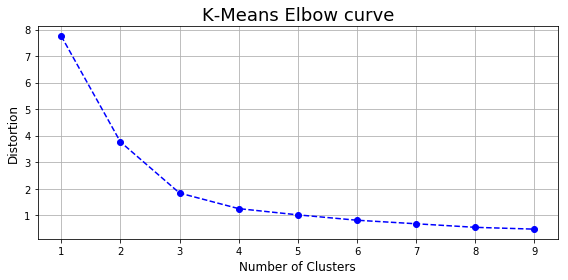

In [71]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(1, 10):
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=0, n_init = 12, max_iter=300, tol=0.00001)
    kmeans.fit(restaurants_clustering_df)
    distorsions.append(kmeans.inertia_)

fig, ax = subplots(figsize=(8, 4))
ax.plot(range(1, 10), distorsions, '--bo')
ax.set_xlabel('Number of Clusters', fontsize=12)
ax.set_ylabel('Distortion', fontsize=12)
plt.grid(True)
plt.title('K-Means Elbow curve', fontsize='18')
plt.tight_layout()
plt.show()

The graph presents an elbow point with 3 clusters.

In [73]:
kmeans = KMeans(init="k-means++", n_clusters=3, random_state=0, n_init = 12, max_iter=300, tol=0.0001)
kmeans.fit(restaurants_clustering_df)

kmeans.labels_

array([0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2], dtype=int32)

### K-means clustering results

We'll insert a new column which will be corresponded to the K-means cluster results.

In [74]:
stations_restaurants_grouped_df.insert(1, 'Cluster Label', kmeans.labels_)

In [75]:
stations_restaurants_grouped_df.head()

,station,Cluster Label,lat,lng,Min Distance from Station,Restaurants Count,Norm Min Distance from Station,Norm Restaurants Count
0,Syntagma Metro Station,0,37.975235,23.735298,133,12,-0.266718,0.388438
12,Akropoli Metro Station,1,37.968516,23.730195,513,8,0.124632,0.153144
20,Evangelismos Metro Station,1,37.976173,23.747163,518,3,0.129781,-0.140974
23,Monastiraki Metro Station,0,37.976067,23.725752,109,14,-0.291434,0.506085
37,Panormou Metro Station,2,37.993298,23.764135,121,8,-0.279076,0.153144


Then we'll visualize the metro stations clusters on the Athens metropolitan area map:

In [76]:
cluster_colors = ['orange', 'red', 'blue']

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

markers_colors = []
for lat, lon, poi, cluster in zip(stations_restaurants_grouped_df['lat'], stations_restaurants_grouped_df['lng'], 
                                  stations_restaurants_grouped_df['station'], stations_restaurants_grouped_df['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster + 1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=cluster_colors[cluster],
        fill=True,
        fill_color=cluster_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

then, we'll create a scatter plot to distinguish the clusters from the normalized values (Min Distance from Station and Restaurants Count)

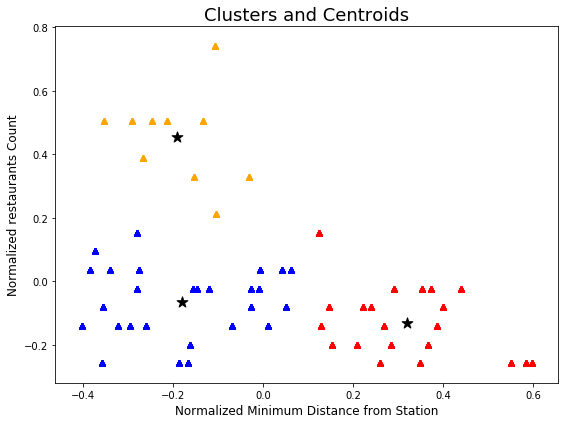

In [78]:
fig, ax = subplots(figsize=(8, 6))
for label in kmeans.labels_:
    plt.scatter(stations_restaurants_grouped_df[stations_restaurants_grouped_df['Cluster Label'] == label]['Norm Min Distance from Station'],
                stations_restaurants_grouped_df[stations_restaurants_grouped_df['Cluster Label'] == label]['Norm Restaurants Count'],
                marker='^', color=cluster_colors[label])
for centroid in kmeans.cluster_centers_:
#     print(centroid)
    plt.scatter(centroid[0], centroid[1], s=130, marker="*", color='black')
ax.set_xlabel('Normalized Minimum Distance from Station', fontsize=12)
ax.set_ylabel('Normalized restaurants Count', fontsize=12)
plt.title('Clusters and Centroids', fontsize='18')
plt.tight_layout()
plt.show()

Now let's see all of the metro line stations that correspond to each cluster (potential):

### High potential (blue in map)

It is the cluster #2 where the number of restaurants are less and the minimum distance from station high.

In [79]:
stations_restaurants_grouped_df.loc[stations_restaurants_grouped_df['Cluster Label'] == 2]

,station,Cluster Label,lat,lng,Min Distance from Station,Restaurants Count,Norm Min Distance from Station,Norm Restaurants Count
37,Panormou Metro Station,2,37.993298,23.764135,121,8,-0.279076,0.153144
59,Sygrou-Fix Metro Station,2,37.964919,23.726618,44,1,-0.358376,-0.258621
60,Aghios Dimitrios Metro Station,2,37.940089,23.740915,106,3,-0.294524,-0.140974
109,Kerameikos Metro Station,2,37.978550,23.711564,30,7,-0.372794,0.094320
144,Egaleo Metro Station,2,37.991428,23.681813,326,3,-0.067953,-0.140974
147,Aghios Ioannis Metro Station,2,37.958003,23.734743,230,1,-0.166821,-0.258621
148,Victoria ISAP Station,2,37.993158,23.729811,18,6,-0.385152,0.035497
169,Petralona ISAP Station,2,37.968341,23.709012,250,5,-0.146223,-0.023327
182,Tavros ISAP Station,2,37.962494,23.703367,385,6,-0.007191,0.035497
192,Sepolia Metro Station,2,38.002892,23.713120,433,6,0.042242,0.035497


### Average potential (orange in map)

There are already a number of similar restaurants in the neighborhood but the respective investment is not brohibited to open a new one since the average distance from metro line station is high.

In [80]:
stations_restaurants_grouped_df.loc[stations_restaurants_grouped_df['Cluster Label'] == 0]

,station,Cluster Label,lat,lng,Min Distance from Station,Restaurants Count,Norm Min Distance from Station,Norm Restaurants Count
0,Syntagma Metro Station,0,37.975235,23.735298,133,12,-0.266718,0.388438
23,Monastiraki Metro Station,0,37.976067,23.725752,109,14,-0.291434,0.506085
45,Omonia Metro Station,0,37.984602,23.726186,186,14,-0.212135,0.506085
63,Panepistimio Metro Station,0,37.980004,23.732354,288,18,-0.107088,0.741379
81,Monastiraki ISAP Station,0,37.976044,23.725204,152,14,-0.247150,0.506085
95,Omonoia ISAP Station,0,37.984100,23.728071,50,14,-0.352196,0.506085
116,Thisseio ISAP Station,0,37.976166,23.720449,263,14,-0.132835,0.506085
158,Ampelokipi Metro Station,0,37.987439,23.757075,243,11,-0.153432,0.329615
210,Aghios Antonios Metro Station,0,38.006380,23.699421,290,9,-0.105029,0.211968
233,Peristeri Metro Station,0,38.012749,23.696161,361,11,-0.031908,0.329615


### Low potential (red in map)

There are already a number of similar restaurants in the neighborhood as well as close to the metro line station.

In [81]:
stations_restaurants_grouped_df.loc[stations_restaurants_grouped_df['Cluster Label'] == 1]

,station,Cluster Label,lat,lng,Min Distance from Station,Restaurants Count,Norm Min Distance from Station,Norm Restaurants Count
12,Akropoli Metro Station,1,37.968516,23.730195,513,8,0.124632,0.153144
20,Evangelismos Metro Station,1,37.976173,23.747163,518,3,0.129781,-0.140974
130,Attiki Metro Station,1,37.999452,23.722549,754,5,0.372829,-0.023327
135,Megaro Moussikis Metro Station,1,37.979014,23.753173,534,4,0.146259,-0.082150
139,Metaxourghio Metro Station,1,37.985549,23.720734,674,5,0.290440,-0.023327
154,Neos Kosmos Metro Station,1,37.957934,23.727630,749,2,0.367680,-0.199797
156,Larisis Metro Station,1,37.991851,23.720942,541,2,0.153468,-0.199797
174,Attiki ISAP Station,1,37.999735,23.722709,736,5,0.354292,-0.023327
179,Dafni Metro Station,1,37.948246,23.740441,768,3,0.387247,-0.140974
188,Agios Nikolaos ISAP Station,1,38.006748,23.727649,607,4,0.221439,-0.082150
